In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
edu = pd.read_csv("education_dataset.csv")
edu.head(10)

,Id,Neighborhood,Id.1,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,1,Allegheny Center,1,1002,139.000000,10,14.000000,0,10.000000,0,...,87,52.000000,274,77.000000,80,46.000000,125,66.000000,8,11.000000
1,2,Allegheny West,2,293,72.000000,0,10.000000,0,10.000000,0,...,16,10.000000,88,34.000000,33,29.000000,27,31.000000,20,26.000000
2,3,Allentown,3,1577,227.187148,19,27.000000,0,17.320508,0,...,54,34.871192,70,42.626283,35,29.529646,22,29.597297,0,17.320508
3,4,Arlington,4,1296,218.515446,31,32.878564,0,17.320508,0,...,147,59.405387,94,43.127717,25,22.158520,4,15.779734,0,17.320508
4,5,Arlington Heights,5,121,63.000000,0,10.000000,0,10.000000,0,...,0,10.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
5,6,Banksville,6,3244,480.985447,5,20.518285,0,20.000000,0,...,333,137.793324,606,163.874952,581,209.348991,75,59.539903,0,20.000000
6,7,Bedford Dwellings,7,740,96.000000,15,10.000000,0,10.000000,0,...,47,22.000000,26,23.000000,0,10.000000,0,10.000000,0,10.000000
7,8,Beechview,8,5905,522.106311,123,99.924972,0,31.622777,0,...,633,147.621137,1105,222.198110,325,107.009345,87,57.818682,20,42.154478
8,9,Beltzhoover,9,1173,230.724944,0,20.000000,0,20.000000,0,...,46,55.901699,64,41.291646,72,45.563143,0,20.000000,0,20.000000
9,10,Bloomfield,10,6612,403.312534,59,36.331804,0,31.622777,0,...,408,106.714573,1801,235.274308,1112,173.280120,310,84.172442,216,74.182208


# Metric
### The metric we're using for our project is "money making potential"

## My Submetric: Education
### Regarding money making, it's common knowledge that in general, with higher education, higher income can be expected. This is not a hard and fast rule. For example, as a whole, individuals with masters degrees tend to make more money than those with doctorates. However, we're going to examine which neighborhoods have the highest graduation rates in graduate, undergraduate, and highschool education. Since individuals with masters degrees tend to make more money than those with graduate degrees, we're only going to consider masters degrees for graduate school. 

In [31]:
total_count = "Estimate; Total:"
highschool_count = "Estimate; Total: - Regular high school diploma"
undergrad_count = "Estimate; Total: - Bachelor's degree"
graduate_count = "Estimate; Total: - Master's degree"
print("Total row")
print(edu[total_count])
print("Highschool graduate row")
print(edu[highschool_count])
print("Undergrad graduate row")
print(edu[undergrad_count])
print("Graduate row")
print(edu[graduate_count])

Total row
0     1002
1      293
2     1577
3     1296
4      121
      ... 
84    1993
85      91
86     850
87    2539
88    1066
Name: Estimate; Total:, Length: 89, dtype: int64
Highschool graduate row
0     116
1      36
2     579
3     412
4       5
     ... 
84    504
85     35
86    161
87    839
88    409
Name: Estimate; Total: - Regular high school diploma, Length: 89, dtype: int64
Undergrad graduate row
0     274
1      88
2      70
3      94
4       0
     ... 
84    523
85     17
86    147
87    537
88     79
Name: Estimate; Total: - Bachelor's degree, Length: 89, dtype: int64
Graduate row
0      80
1      33
2      35
3      25
4       0
     ... 
84    233
85      7
86     82
87    186
88     75
Name: Estimate; Total: - Master's degree, Length: 89, dtype: int64


In [32]:
edu["hs_ratio"] =  (edu[highschool_count] / edu[total_count]) * 100
edu["undergrad_ratio"] =  (edu[undergrad_count] / edu[total_count]) * 100
edu["graduate_ratio"] =  (edu[graduate_count] / edu[total_count]) * 100
print(edu["hs_ratio"])
print(edu["undergrad_ratio"])
print(edu["graduate_ratio"])

0     11.576846
1     12.286689
2     36.715282
3     31.790123
4      4.132231
        ...    
84    25.288510
85    38.461538
86    18.941176
87    33.044506
88    38.367730
Name: hs_ratio, Length: 89, dtype: float64
0     27.345309
1     30.034130
2      4.438808
3      7.253086
4      0.000000
        ...    
84    26.241846
85    18.681319
86    17.294118
87    21.150059
88     7.410882
Name: undergrad_ratio, Length: 89, dtype: float64
0      7.984032
1     11.262799
2      2.219404
3      1.929012
4      0.000000
        ...    
84    11.690918
85     7.692308
86     9.647059
87     7.325719
88     7.035647
Name: graduate_ratio, Length: 89, dtype: float64


### What's going on?
Since some neighborhoods have more people than others, it wouldn't be fair to compare them based on raw counts. So what we're really looking for is the ratios. The way this dataset works is, each number indicates the highest eduation level recieved for that recipient. So if there are 100 entires in "basic highschool diploma" for a given neighborhood, then 100 people in that neighborhood who took this school have a highschool education as their highest eduational achievement. If there are 200 people in the neighborhood, this is quite bad. If there are 10,000 people in the neighborhood, this is quite good. This is the motivation behind finding the ratios. 

### What next?
In order to find the best neighborhood, we're going to try to discover which neighborhood corresponds to the largest ratio of people who attained graduate educations as their highest attainment. This will be a good indication of how much of an emphasis this neighborhood puts on education. For further insight, we'll examine undergraduate and highschool. Note that if one neighborhood has 10% of people having HS as their highest attained education and another neighborhood has 5%, this is not enough information to compare the two. This is because there are two reasons why the second neighborhood might have a lower HS graduation ratio: 
- more people go on to university. This would decrease the HS graduation highest attainment ratio, but it's actually a good thing
- more people drop out of high school. This would also decrease the HS graduation highest attainment ratio, but it's a bad thing.

In [33]:
# getting the neighborhooods corresponding to the maximum values of the ratios.
# DataFrame.idxmax(axis=0, skipna=True, numeric_only=False)[source]
#     Return index of first occurrence of maximum over requested axis.
max_hs = edu["hs_ratio"].idxmax()
max_undergrad = edu["undergrad_ratio"].idxmax()
max_graduate = edu["graduate_ratio"].idxmax()
# Now to get the names of the neighborhoods based on the ids of the maximum values
# usage of loc: df.loc[row_indexer,column_indexer]
max_hs_name = edu.loc[max_hs, "Neighborhood"]
max_undergrad_name = edu.loc[max_undergrad, "Neighborhood"]
max_graduate_name = edu.loc[max_graduate, "Neighborhood"]

# printing the final results
print("Neighborhood known max HS graduation attainment ")
print(max_hs_name)
print("Result:")
print(edu.loc[max_hs, "hs_ratio"])
print()
print("Neighborhood known max undergrad education attainment ")
print(max_undergrad_name)
print("Result:")
print(edu.loc[max_undergrad, "undergrad_ratio"])
print()
print("Neighborhood known max graduate education attainment ")
print(max_graduate_name)
print("Result:")
print(edu.loc[max_graduate, "graduate_ratio"])
print()

Neighborhood known max HS graduation attainment 
Knoxville
Result:
44.83454398708636

Neighborhood known max undergrad education attainment 
Strip District
Result:
41.52046783625731

Neighborhood known max graduate education attainment 
Friendship
Result:
33.31085637221848



### Analysis of results
Luckly, I checked in on these districts to make sure that the results were reasonable. First run, I got:
Chateau
Strip District
South Shore
Turns out the results weren't accurate. Only 8 poeple from south shore filled out this form, and only 3 people from Chateau. 

Finally, I got Friendship as the neighborhood with the highest ratio of people whom attained a graduate education as their highest level. around 1400 people from friendship filled out this survey, and 33% of them attained a graduate degree as their highest level of education! Additionally, around 25% of people from Friendship attained a bachelors degree. If we sum this, we get 58% of people had HS or masters as their highest education level.

Looking at Strip District, we have that 41% of people attained an undergrad education, and around 17% of people went on to gain a masters education. So if we sum this, 58% of people either had HS or masters as highest education level. 

This is a beautiful symmetry! We have that both Friendship and Strip District had 58% of people finishing either HS or undergraduate education! Knowing only that, we'd place Friendship in the lead since it has more college graduates. But, if Strip District has enough Doctorate students, it might be enough to make up for the loss! Strip District has about 7% of people having a doctorate as their highest educational attainment, whereas Friendship has 9%. So, clearly, Friendship beats out Strip District on education. 

### Conclusion
We can conclude that based on the data provided, the best neighborhood based on education is Friendship! In order to compare with other submetrics, we'll sort by graduate attainment.

32    33.310856
65    32.581454
55    30.648049
74    24.713400
62    24.702453
        ...    
57     0.483871
43     0.180018
36     0.000000
6      0.000000
4      0.000000
Name: graduate_ratio, Length: 89, dtype: float64


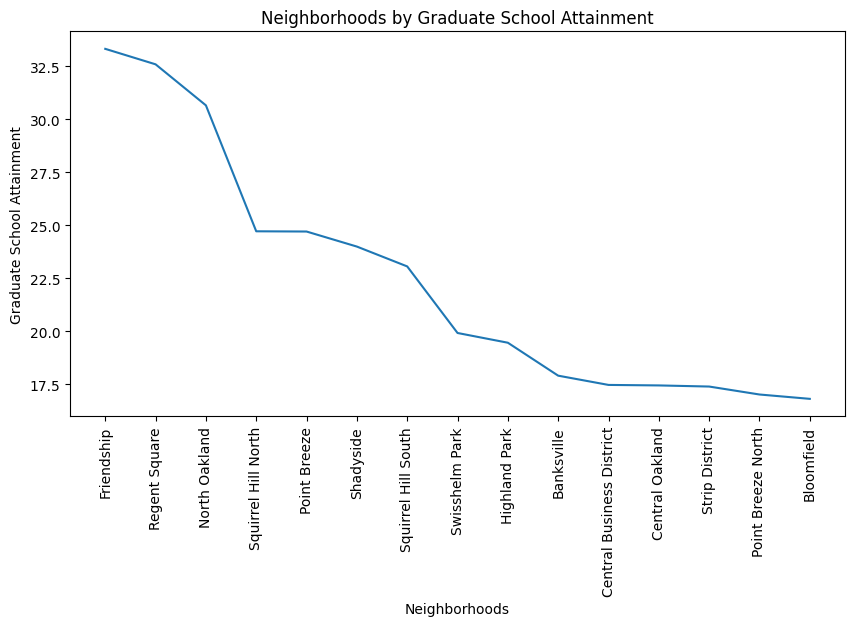


Top 15 Neighborhoods based on Graduate School Attainment
1 Friendship
2 Regent Square
3 North Oakland
4 Squirrel Hill North
5 Point Breeze
6 Shadyside
7 Squirrel Hill South
8 Swisshelm Park
9 Highland Park
10 Banksville
11 Central Business District
12 Central Oakland
13 Strip District
14 Point Breeze North
15 Bloomfield


In [34]:
sorted_edu = edu.sort_values(by="graduate_ratio", ascending=False)
print(sorted_edu["graduate_ratio"])
ratio_sorted = sorted_edu["graduate_ratio"].to_list()
nbh_by_graduate = sorted_edu["Neighborhood"]
nbh_by_graduate = nbh_by_graduate.to_list()

top_15_neighborhoods = nbh_by_graduate[:15]

top_15_ratios = ratio_sorted[:15]

plt.figure(figsize=(10, 5))
plt.plot(top_15_neighborhoods, top_15_ratios)
plt.xlabel('Neighborhoods')
plt.ylabel('Graduate School Attainment')
plt.title('Neighborhoods by Graduate School Attainment')
plt.xticks(rotation='vertical')
plt.show()


print()
print("Top 15 Neighborhoods based on Graduate School Attainment")
for i in range(15):
    print(str(i + 1) + " " + nbh_by_graduate[i])